In [8]:
import matplotlib.pyplot as plt

def parse_clusters(s):
    lines = s.splitlines()
    clusters = {}
    
    for line in lines:
        part, cluster = list(line.split())
        if cluster not in clusters:
            clusters[cluster] = set()
        clusters[cluster].add(part)
    
    return clusters


def plot_cluster_histogram(clusters, outliers=0, title='Cluster size distribution'):
    print('# of clusters: ' + str(len(clusters)))
    
    sizes = []
    
    for cluster in clusters:
        sizes.append(len(clusters[cluster]))
    
    total = 0
    for i in sizes:
        total += i
    print('total parts: ' + str(total))
    
    sizes.sort()
    plt.title(title)
    plt.hist(sizes[0:len(sizes) - outliers], 500)
    plt.yscale('log', nonposy='clip')
    plt.xlabel('Number of parts within a cluster')
    plt.ylabel('Number of clusters')


def print_cluster_sizes(clusters, size_threshold):
    for cluster in clusters:
        size = len(clusters[cluster])
        if size >= size_threshold:
            print(cluster + ': ' + str(size))
    
    
def print_cluster(cluster):
    fsa = open('../blast/db/synbiohubdb/synbiohub.fsa', 'r').read()
    
    parts = {}
    
    lines = fsa.splitlines()
    uri_line = True
    for line in lines:
        if uri_line:
            uri = line[1:len(line)]
        else:
            seq = line
            parts[uri] = seq
            
        uri_line = not uri_line
    
    for uri in cluster:
        print(uri)
        print(parts[uri])

# of clusters: 11056
total parts: 48548


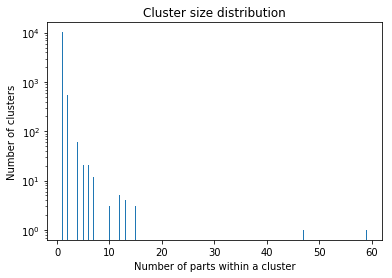

In [9]:
f = open('jaccard_clusters/clusters_p1.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 2)

# of clusters: 12581
total parts: 48548


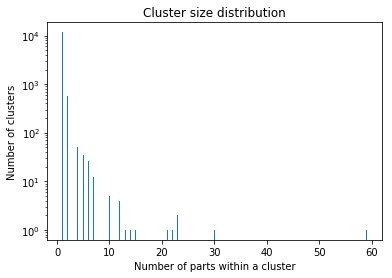

In [10]:
f = open('jaccard_clusters/clusters_p05.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 2)

# of clusters: 13831
total parts: 48548


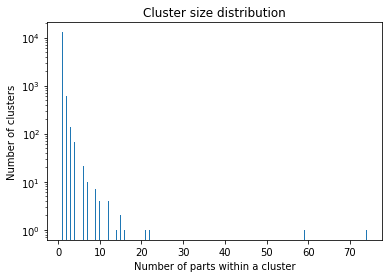

In [11]:
f = open('jaccard_clusters/clusters_p025.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 1)

# of clusters: 15380
total parts: 48548


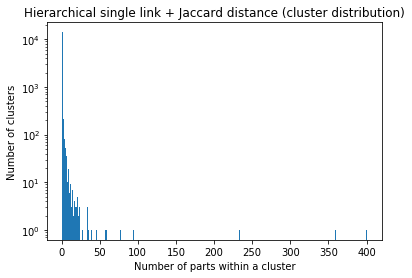

In [24]:
f = open('jaccard_clusters/clusters_p0125.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, outliers=1, title='Hierarchical single link + Jaccard distance (cluster distribution)')

# of clusters: 15380
total parts: 48548


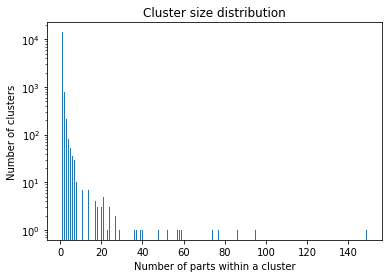

In [15]:
f = open('jaccard_clusters/clusters_p00625.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 6)

# of clusters: 14807
total parts: 48548
30346: 32159
30571: 17
42878: 22


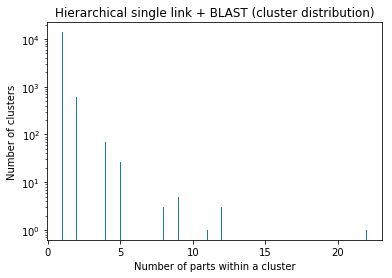

In [23]:
f = open('blast_clusters/clusters_p00001.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, outliers=1, title='Hierarchical single link + BLAST (cluster distribution)')
print_cluster_sizes(clusters, 15)
#print_cluster(clusters['30571'])

# of clusters: 14807
total parts: 48548
30346: 32159
30571: 17
42878: 22


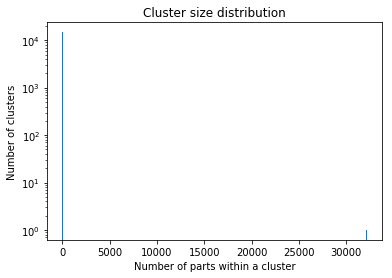

In [17]:
f = open('blast_clusters/clusters_p00001.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 0)
print_cluster_sizes(clusters, 15)


# of clusters: 43397
total parts: 48548
42483: 5152


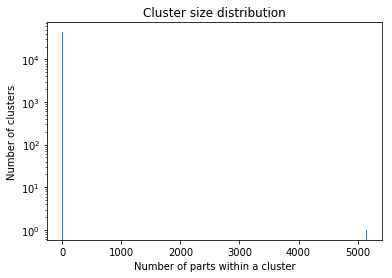

In [18]:
f = open('blast_clusters/clusters_5000.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 0)
print_cluster_sizes(clusters, 2)

# of clusters: 34606
total parts: 48548
36414: 13943


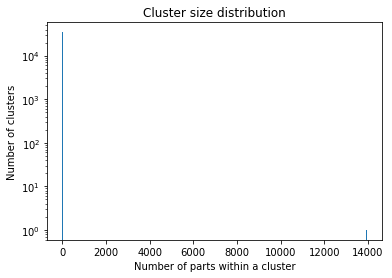

In [19]:
f = open('blast_clusters/clusters_2500.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 0)
print_cluster_sizes(clusters, 2)
#print_cluster(clusters['42483'])

# of clusters: 19573
total parts: 48548
36414: 28976


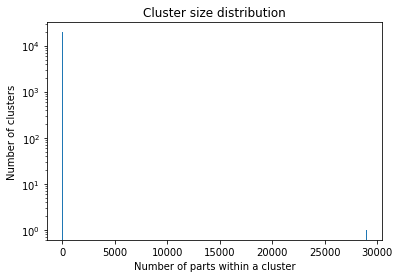

In [20]:
f = open('blast_clusters/clusters_1000.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 0)
print_cluster_sizes(clusters, 2)

# of clusters: 15809
total parts: 48548
36414: 32740


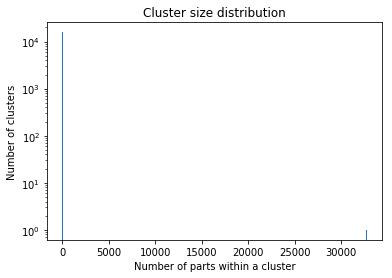

In [21]:
f = open('blast_clusters/clusters_500.txt', 'r')
clusters = parse_clusters(f.read())
plot_cluster_histogram(clusters, 0)
print_cluster_sizes(clusters, 2)

24875: 11
20013: 11
41382: 16
33517: 15
4183: 10
24486: 13
21447: 12
42000: 10
21962: 11
22031: 15
36440: 10
21515: 11
16641: 12
39465: 13
43984: 10
24578: 10
34202: 11
36115: 21
44278: 12
44404: 24
23178: 14
19822: 12
19624: 13
11339: 10
22781: 12
38187: 12
25152: 50
42004: 15
https://synbiohub.org/public/bsu/BO_5571/1
AGAAAGGCTTGCTTAATACAGCCTTTCTCTTTTTACTA
https://synbiohub.org/public/bsu/BO_3925/1
TGTCATGAAAGTATTATCCTAATAAAAAG
https://synbiohub.org/public/bsu/BO_3581/1
TTTACTATAAATGAAAGCGCTATCATAAAC
https://synbiohub.org/public/bsu/BO_3927/1
ATAAAATCATGAAACATGTTAAGATGACATAAAATAGAGA
https://synbiohub.org/public/bsu/BO_2865/1
CGAATTGTCGGAATGTCCTGCTTTCGCTAAAATAAAATCATGAA
https://synbiohub.org/public/bsu/BO_3926/1
ATCATAAACGTCTTTATTTCTTTTAAAAATGATGTAAAAGGCGAATTGTCGGAA
https://synbiohub.org/public/bsu/BO_27684/1
TGTCATGAAAGTATTATCCTAATAAAAAGAGAGAAAGGCTTGCTTAATACAGCCTTTCTCTTTTTACTATAAATGAAAGCGCTATCATAAACGTCTTTATTTCTTTTAAAAATGATGTAAAAGGCGAATTGTCGGAATGTCCTGCTTTCGCTAAAATAAAATCATGAAACATGTTAAG

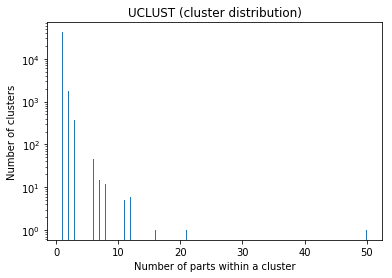

In [22]:
f = open('usearch_clusters/clusters_pX.txt', 'r')
clusters = parse_clusters(f.read())
print_cluster_sizes(clusters, 10)
print_cluster(clusters['34202'])
plot_cluster_histogram(clusters, outliers=0, title='UCLUST (cluster distribution)')